# BigMart

### Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 


In [63]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as CVS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
trainData = pd.read_csv('/Users/divya/Documents/technolabSoft_internship/proj01_data/Train.csv') #train data
testData = pd.read_csv('/Users/divya/Documents/technolabSoft_internship/proj01_data/Test.csv')

In [3]:
trainData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
testData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print('For training data : ')
print('size = ', trainData.size)
print('shape = ', trainData.shape)
print('dimension = ', trainData.ndim)

For training data : 
size =  102276
shape =  (8523, 12)
dimension =  2


In [6]:
print('For testing data : ')
print('size = ', testData.size)
print('shape = ', testData.shape)
print('dimension = ', testData.ndim)

For testing data : 
size =  62491
shape =  (5681, 11)
dimension =  2


In [7]:
data = pd.concat([trainData, testData], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 12)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Univariate Analysis

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

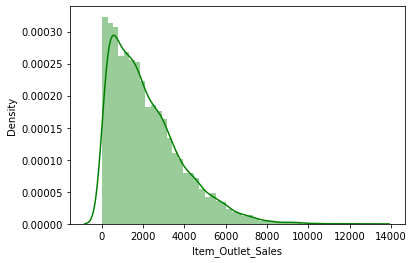

In [9]:
# Target Variable
sns.distplot(data.Item_Outlet_Sales, color = "green")



Data is skewed

In [10]:
# Check the Dist of Sales
data.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

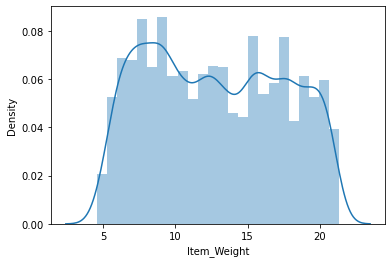

In [11]:
# Plot the Item Weight
sns.distplot(data.Item_Weight.dropna()) # seaborn is not compatible with missing values
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

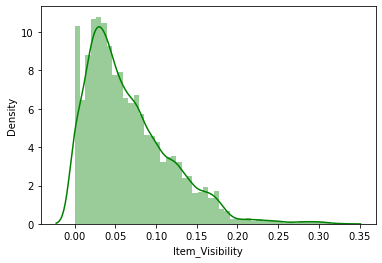

In [12]:
# Item Visibility
sns.distplot(data.Item_Visibility, color = "green")

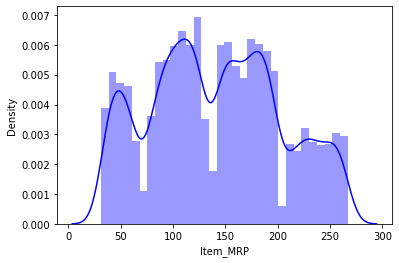

In [13]:
# Item Mrp
sns.distplot(data.Item_MRP, color = "blue")
plt.show()

In [14]:
data.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

### Summary

Target Variable is skewed in nature with the average sales of 2196 dollars and a sd of 1700 and min sales of 31 dollard and max sales of 14000 dollars.

Similary, Item MRP shows 04 different price distributions with min MRP as 31 dollars and max MRP as 266 dollars.

Item Weight has no pattern in Univ Plot

Item Visibility is skewed in shape meaning some products have a higher visibility in comparison to the rest


<AxesSubplot:>

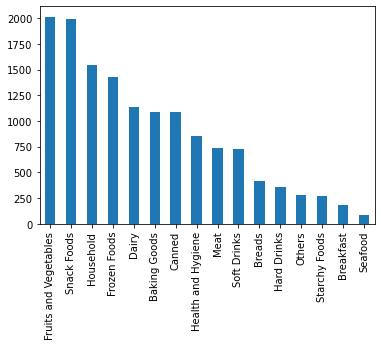

In [15]:
# Item Type
data.Item_Type.value_counts().plot(kind = "bar")

# Top5 are Fruits and Veggies, Dairy, Household, Snack & Frozen.

<AxesSubplot:>

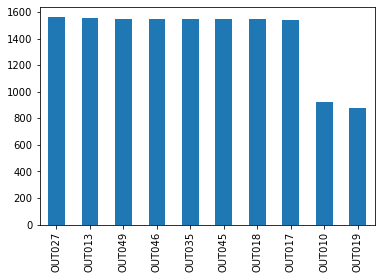

In [16]:
# Item Fat Content
data.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                              value =["Low Fat", "Low Fat", "Regular"], inplace = True)

# Outlet ID
data.Outlet_Identifier.value_counts().plot(kind = "bar")

<AxesSubplot:>

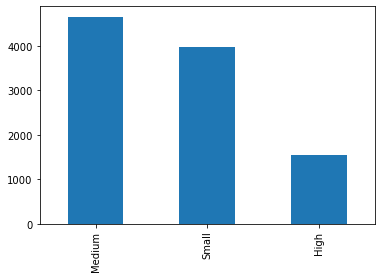

In [17]:
# Outlet Size
data.Outlet_Size.value_counts().plot(kind = "bar")

### Bivariate Analysis

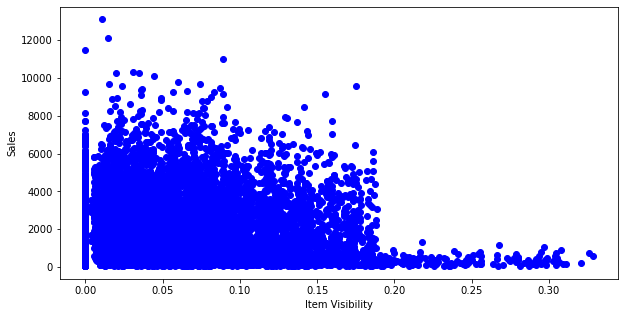

In [18]:
# Item Visibility Vs Sales
plt.figure(figsize = [10, 5])
plt.scatter(data.Item_Visibility, data.Item_Outlet_Sales, color = "blue")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

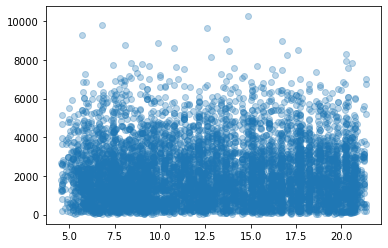

In [19]:
# Item Weight Vs Sales
plt.scatter(data.Item_Weight, data.Item_Outlet_Sales, alpha = 0.3)
plt.show()

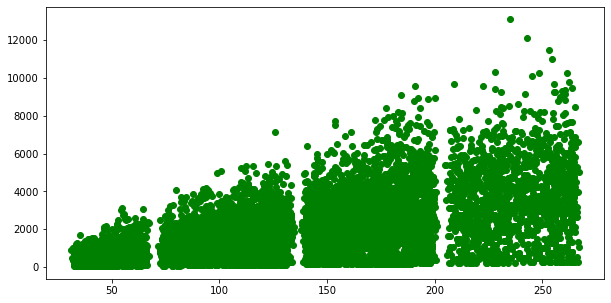

In [20]:
# Item MRP vs Sales
plt.figure(figsize = [10,5])
plt.scatter(data.Item_MRP, data.Item_Outlet_Sales, color = "green")
plt.show()

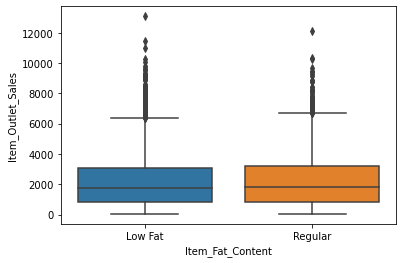

In [21]:
# Item Fat Content Vs Sales
sns.boxplot(x = "Item_Fat_Content", y  = "Item_Outlet_Sales", data = data)
plt.show()

In [22]:
data.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


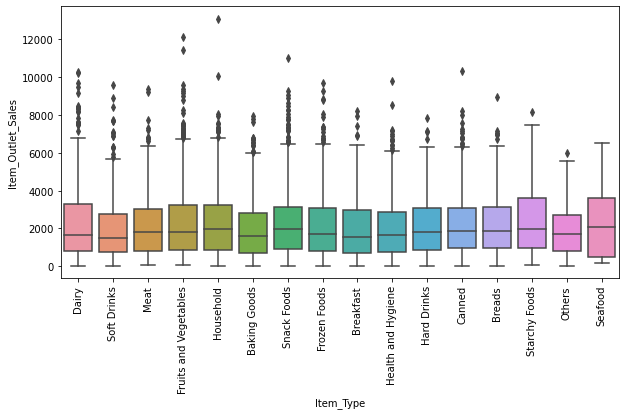

In [23]:
# Item Type Vs Sales
plt.figure(figsize = [10,5])
sns.boxplot(data.Item_Type, data.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.show()

### Inference:

Seafood has a high MRP and hence the sales is high. It is competing with the regular items.

Snack Foods, Dairy, Fruits and Veggies, Household Items are selling the most.

### Find out the List of all the Items for which the sales is above 8K dollars.

In [24]:
data.loc[data.Item_Outlet_Sales>8000, "Item_Type"].unique()

array(['Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods',
       'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks',
       'Canned', 'Household', 'Breakfast', 'Meat'], dtype=object)

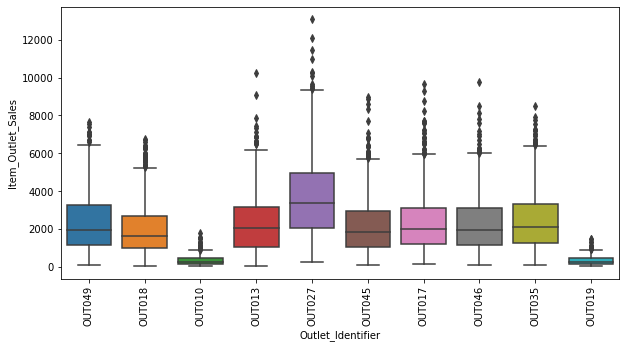

In [25]:
# Outlet Id vs Sales
plt.figure(figsize = [10,5])
sns.boxplot(x = "Outlet_Identifier", y ="Item_Outlet_Sales", data = data)
plt.xticks(rotation = 90)
plt.show()

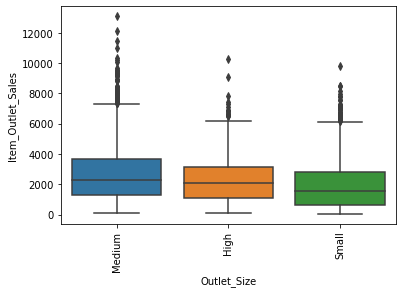

In [26]:
# Outlet Size vs Sales
sns.boxplot(x = "Outlet_Size", y ="Item_Outlet_Sales", data = data)
plt.xticks(rotation = 90)
plt.show()

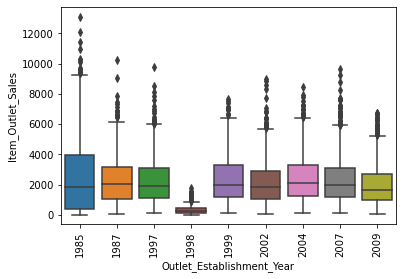

In [27]:
sns.boxplot(x = "Outlet_Establishment_Year", y ="Item_Outlet_Sales", data = data)
plt.xticks(rotation = 90)
plt.show()

In [28]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

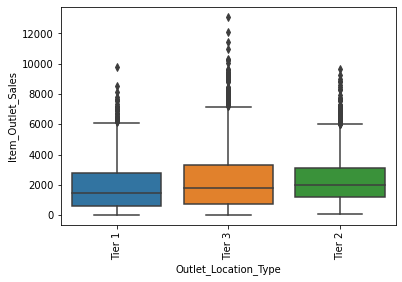

In [29]:
sns.boxplot(x = "Outlet_Location_Type", y ="Item_Outlet_Sales", data = data)
plt.xticks(rotation = 90)
plt.show()

# Much of the Sales is happening in TIER3 Cities.

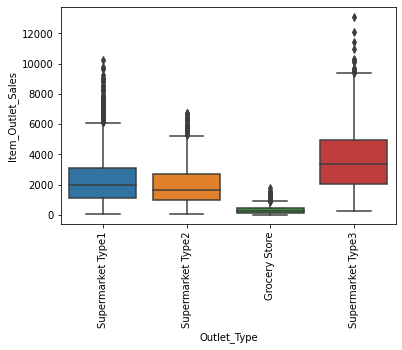

In [30]:
sns.boxplot(x = "Outlet_Type", y ="Item_Outlet_Sales", data = data)
plt.xticks(rotation = 90)
plt.show()

### Summary - Bivariate Analysis

Low Fat Items have a higher sales than the Regular Items

Seafood has a high MRP and Low Demand where as the products that have made money over 8K are ['Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods', 'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks', 'Canned', 'Household', 'Breakfast', 'Meat']

1985 Store is the oldest store and is really making a good money. Suggestion: Create Brand Perception in the eyes of Customer.

Tier 3 City, Medium Size Outlet with Theme of OUT027 and S3 will be a better combination if we are planning to operate business in a new city.

### Handling missing values : 

In [31]:
missing_values_count = data.isnull().sum()
missing_values_count

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [32]:
np.mean(data['Item_Weight'])

12.792854228644991

In [33]:
data['Item_Weight'].fillna(12, inplace = True)

In [34]:
mode(data['Outlet_Size'])

'Medium'

In [35]:
data['Outlet_Size'].fillna('Medium', inplace = True)

### Handling outliers

In [36]:
#basic statistics about the training data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.656711,4.244771,4.555,9.300000,12.000000,16.000000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


<AxesSubplot:xlabel='Item_Outlet_Sales'>

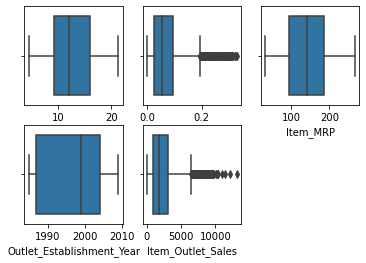

In [37]:
#checking for outliers

plt.figsize = (20,10)
plt.subplot(2,3,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(data['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(data['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(data['Item_Outlet_Sales'])

Upper limit:  0.19453961000000003
Lower limit:  -0.07346667400000001


Text(0.5, 1.0, 'Item_Visibility Distribution after removing outliers')

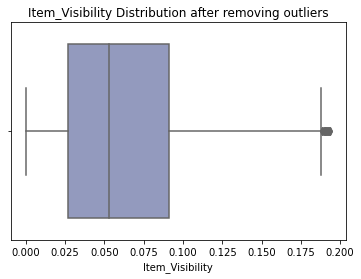

In [38]:
#removing ouliers

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
data = data[(data['Item_Visibility'] > lower) & (data['Item_Visibility'] < upper)]


sns.boxplot(x=data['Item_Visibility'], palette='BuPu')
plt.title('Item_Visibility Distribution after removing outliers')




Upper limit:  6497.7086500000005
Lower limit:  -2497.2493500000005


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

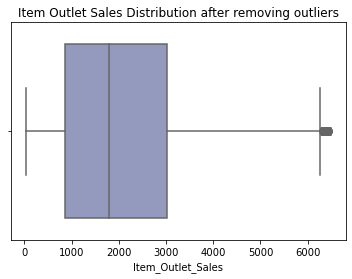

In [39]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

<AxesSubplot:>

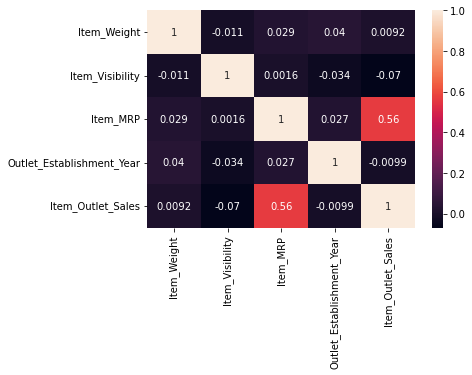

In [40]:
#correlation matrix


plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)

### Data Visualisation
categorical columns-->

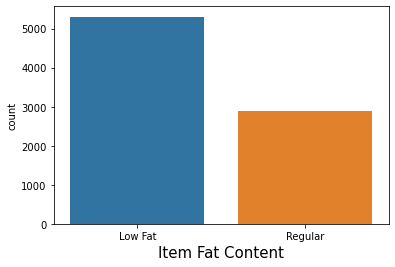

In [41]:
#Countplot for Item_Fat_Content

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

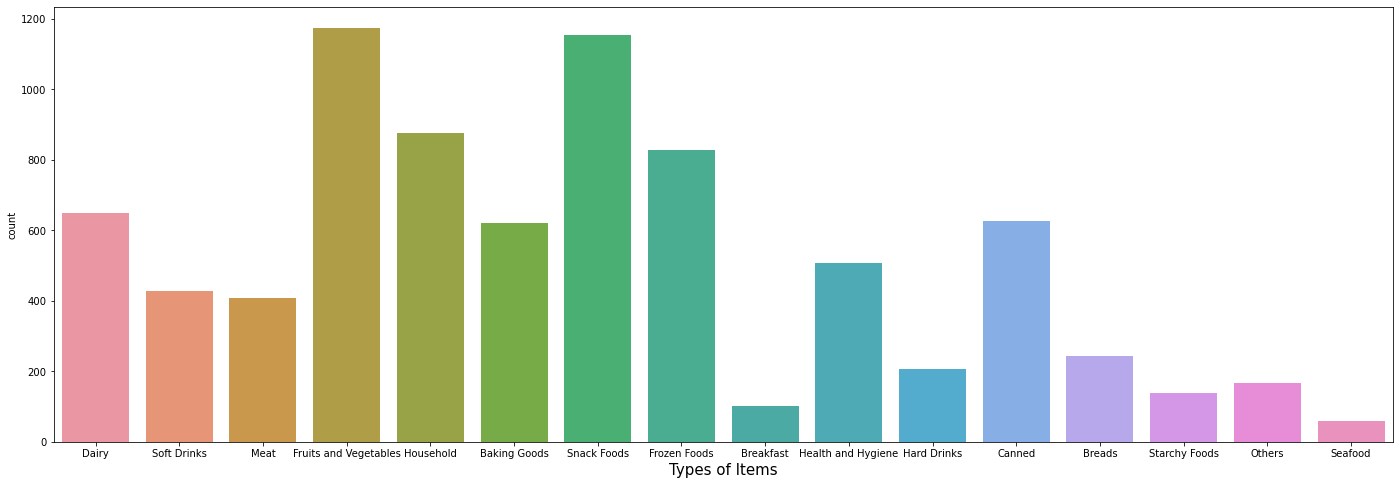

In [42]:
#Countplot for Item_Type

plt.figure(figsize=(24,8))
sns.countplot(data=data, x='Item_Type')
plt.xlabel('Types of Items', fontsize=15)
plt.show()

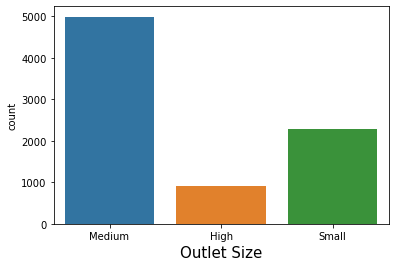

In [43]:
#Countplot for Outlet_Size

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Outlet Size', fontsize=15)
plt.show()

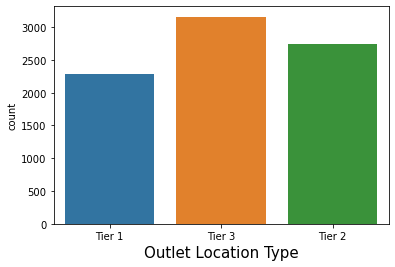

In [44]:
#Countplot for Outlet_Location_Type

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Outlet Location Type', fontsize=15)
plt.show()

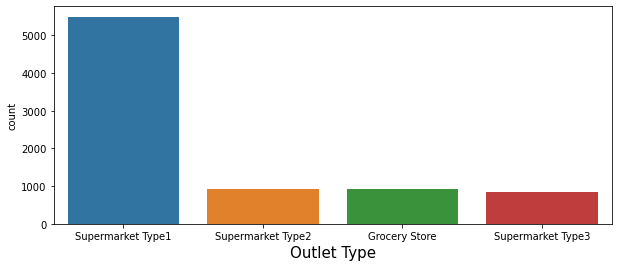

In [45]:
#countplot for Outlet_Type

plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Outlet Type', fontsize=15)
plt.show()

Numerical columns-->

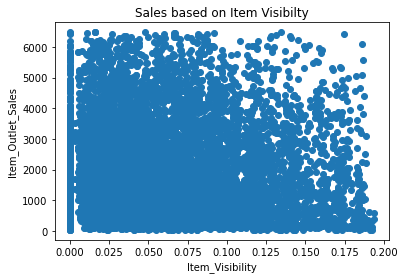

In [46]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

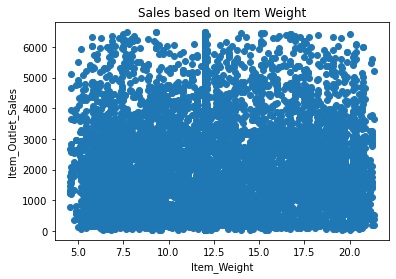

In [47]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

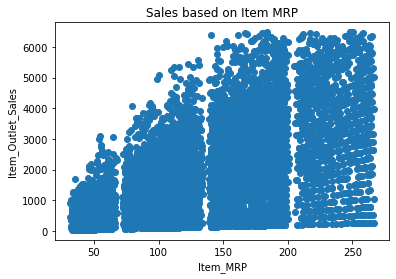

In [48]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

### Feature Engineering:

In [49]:
#Since Item_Identifier, Outlet_Identifier don't have significant values, we can drop them.
data = data.drop(columns = ['Item_Identifier' , 'Outlet_Identifier'],axis = 1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
#Label Encoder for Ordinate Data

le = LabelEncoder()
label = ['Item_Fat_Content' , 'Outlet_Type' , 'Outlet_Size','Outlet_Location_Type'  ]

for i in label:
  data[i] = le.fit_transform(data[i])
data.head()



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,0,2,1,994.7052


In [51]:
# One-Hot encoding (OHE) for Nominal Data

cols = ['Item_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)

data_oh.index = data.index


new_data = pd.concat([data, data_oh], axis=1)
new_data.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1999,1,0,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,1,2,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1999,1,0,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,1,2,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,1987,0,2,1,994.7052,...,0,0,0,1,0,0,0,0,0,0


In [52]:
data = new_data.drop(columns = ['Item_Type'],axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1999,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


### Splitting the train and test data :

In [53]:
x = data.drop(columns = ['Item_Outlet_Sales'],axis = 1)
y = data['Item_Outlet_Sales']

In [54]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [56]:
# Splitting the data into Train and Test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

### Linear Regression Model:

In [57]:
model = LinearRegression()
model.fit(x_train , y_train)

lr_predict = model.predict(x_test)

#scores
mae_score = mean_absolute_error(y_test , lr_predict)
mse_score = mean_squared_error(y_test , lr_predict)
r2score = r2_score(y_test , lr_predict)
print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")
print(f" R^2 Score: {r2score}\n")

#cross validation score
CVS(LinearRegression(),x,y)

 Mean Absolute Error: 810.5042604007353

 Squared Mean Squared Error: 1056.7141009833476

 R^2 Score: 0.4858205494032708



array([0.49170088, 0.48833062, 0.46319831, 0.47573051, 0.48818195])

### Regularized Linear Regression Model

In [58]:
# Lasso Regression Model:
model = Lasso()
model.fit(x_train , y_train)

lasso_prediction = model.predict(x_test)

#checking for scores
mae_score = mean_absolute_error(y_test , lasso_prediction)
mse_score = mean_squared_error(y_test , lasso_prediction)
r2_score = r2_score(y_test , lasso_prediction)
print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")
print(f" R^2 Score: {r2score}\n")

#cross validation score
CVS(Lasso(),x,y)

 Mean Absolute Error: 809.6853534532196

 Squared Mean Squared Error: 1055.44883086204

 R^2 Score: 0.4858205494032708



array([0.49176905, 0.48945862, 0.46322218, 0.47776567, 0.48899559])

In [59]:
# Ridge Regression Model:
model = Ridge()
model.fit(x_train , y_train)

ridge_prediction = model.predict(x_test)

#scores
mae_score = mean_absolute_error(y_test , ridge_prediction)
mse_score = mean_squared_error(y_test , ridge_prediction)

print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")


#cross validation score
CVS(Ridge(),x,y)

 Mean Absolute Error: 810.4131057166376

 Squared Mean Squared Error: 1056.6313968924899



array([0.4916591 , 0.48832999, 0.46316115, 0.47587856, 0.48823103])

### Decision Tree Model:

In [60]:
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model.fit(x_train, y_train)

tree_predict = model.predict(x_test)

# Score Metrics 
DR_MAE = mean_absolute_error(y_test, tree_predict)
DR_MSE = mean_squared_error(y_test, tree_predict)

print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")


# Cross Validation Score check
CVS(DecisionTreeRegressor(),x,y)

 Mean Absolute Error: 705.1656568474025

 Mean Squared Error: 920897.1807455926



array([0.15608333, 0.13874412, 0.11285394, 0.12326287, 0.15387361])

### Random Forest model:

In [61]:
RFmodel = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)
RFmodel.fit(x_train, y_train)


forest_predict = RFmodel.predict(x_test)

# Score Matrics
RFR_MAE = mean_absolute_error(y_test, forest_predict)
RFR_MSE = mean_squared_error(y_test, forest_predict)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")

CVS(RandomForestRegressor(),x, y)

 Mean Absolute Error: 702.7618885049449

 Mean Squared Error: 904597.1580666072



array([0.52654745, 0.51667726, 0.49553216, 0.52570147, 0.53644888])

### XGBoost

In [64]:
model = XGBRegressor()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# Score Matrix
XG_MAE = mean_absolute_error(y_test, y_predict)
XG_MSE = mean_squared_error(y_test, y_predict)

print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")


CVS(XGBRegressor(),x, y)

 Mean Absolute Error: 753.436991816996

 Mean Squared Error: 1051071.426865267



array([0.51046344, 0.50455112, 0.47268265, 0.50893369, 0.51634291])

### Summary:

Out of the 6 models, Random Forest works the best on our data with the average of 51.6%